In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pydicom

# from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from scipy import stats

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 1000000)
pd.set_option("display.max_rows", 100)

# for pandas profiling package
# !jupyter nbextension enable --py widgetsnbextension

df = pd.read_csv('data/train.csv')
df.head(3)

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker


In [200]:
# fig, axes = plt.subplots(ncols=2, figsize=(18, 6), dpi=150)
# sns.distplot(df['FVC'], label='FVC', ax=axes[0])
# stats.probplot(df['FVC'], plot=axes[1])
# axes[0].set_title(f'FVC Distribution in Training Set', size=15, pad=15)
# axes[1].set_title(f'FVC Probability Plot', size=15, pad=15)
# axes[1].get_lines()[0].set_markerfacecolor('#cfc4f8')

In [201]:
# pat = df.groupby(['Patient','SmokingStatus','Age','Weeks','FVC','Percent','Sex']).count().reset_index()
# smoker_dist=pat.loc[pat.SmokingStatus=='Currently smokes']['Age']
# exsmoker_dist=pat.loc[pat.SmokingStatus=='Ex-smoker']['Age']
# nonsmoker_dist=pat.loc[pat.SmokingStatus=='Never smoked']['Age']

# plt.figure(figsize=(10,6))
# sns.kdeplot(smoker_dist,shade=True,label='currenty smokes')
# sns.kdeplot(exsmoker_dist,shade=True,label='Ex-smoker')
# sns.kdeplot(nonsmoker_dist,shade=True,label='Never smoked')

In [202]:
df['Patient_Week'] = df['Patient'].astype(str) + '_' + df['Weeks'].astype(str)

# max_Percent = df[['Patient','Percent']].sort_values('Percent', ascending=False).drop_duplicates(['Patient'])
# min_Percent = df[['Patient','Percent']].sort_values('Percent', ascending=True).drop_duplicates(['Patient'])
# max_Weeks = df[['Patient','Weeks']].sort_values('Weeks', ascending=False).drop_duplicates(['Patient'])
# min_Weeks = df[['Patient','Weeks','Percent']].sort_values('Weeks', ascending=True).drop_duplicates(['Patient'])

# df = pd.merge(df, max_Percent, how='left', on=['Patient'], suffixes=(None, '_max'))
# df = pd.merge(df, min_Percent, how='left', on=['Patient'], suffixes=(None, '_at_Weeks_min',))
# df = pd.merge(df, max_Weeks, how='left', on=['Patient'], suffixes=(None, '_max'))
# df = pd.merge(df, min_Weeks, how='left', on=['Patient'], suffixes=(None, '_min'))

# df['Weekly_Avg_Percent_Change'] = (df['Percent_max'] - df['Percent_min']) / (df['Weeks_max'] - df['Weeks_min']) * -1

# age = df['Age'].min()
# converted_age = getattr(age, "tolist", lambda: value)()
# df['Age_Scaled'] = df['Age'].astype(int) - converted_age

# df['FVC_at_week_0'] = df.loc[df['Weeks'] == 0, 'FVC']
# df['FVC_at_week_6'] = df.loc[df['Weeks'] == 6, 'FVC']
# df['FVC_at_week_15'] = df.loc[df['Weeks'] == 15, 'FVC']
# df['FVC_at_week_17'] = df.loc[df['Weeks'] == 17, 'FVC']

# df.fillna(0, inplace=True)

# def wrangle(df):
#     max_Percent = df[['Patient','Percent']].sort_values('Percent', ascending=False).drop_duplicates(['Patient'])
#     min_Percent = df[['Patient','Percent']].sort_values('Percent', ascending=True).drop_duplicates(['Patient'])
#     max_Weeks = df[['Patient','Weeks']].sort_values('Weeks', ascending=False).drop_duplicates(['Patient'])
#     min_Weeks = df[['Patient','Weeks','Percent']].sort_values('Weeks', ascending=True).drop_duplicates(['Patient'])

# #     df = pd.merge(df, max_Percent, how='left', on=['Patient'], suffixes=(None, '_max'))
# #     df = pd.merge(df, min_Percent, how='left', on=['Patient'], suffixes=(None, '_at_Weeks_min',))
# #     df = pd.merge(df, max_Weeks, how='left', on=['Patient'], suffixes=(None, '_max'))
# #     df = pd.merge(df, min_Weeks, how='left', on=['Patient'], suffixes=(None, '_min'))

# #     df['Weekly_Avg_Percent_Change'] = (df['Percent_max'] - df['Percent_min']) / (df['Weeks_max'] - df['Weeks_min']) * -1

#     age = df['Age'].min()
#     converted_age = getattr(age, "tolist", lambda: value)()
#     df['Age_Scaled'] = df['Age'].astype(int) - converted_age

# #     df['FVC_at_week_0'] = df.loc[df['Weeks'] == 0, 'FVC']
# #     df['FVC_at_week_6'] = df.loc[df['Weeks'] == 6, 'FVC']
# #     df['FVC_at_week_15'] = df.loc[df['Weeks'] == 15, 'FVC']
# #     df['FVC_at_week_17'] = df.loc[df['Weeks'] == 17, 'FVC']
#     df.fillna(0, inplace=True)
#     return df
# df = wrangle(df)
# df.drop(columns = 'Patient', inplace=True)
df.sample(3)

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,Patient_Week
62,ID00019637202178323708467,13,2100,92.858722,83,Female,Ex-smoker,ID00019637202178323708467_13
328,ID00093637202205278167493,16,2728,62.724179,69,Male,Ex-smoker,ID00093637202205278167493_16
1254,ID00342637202287526592911,49,1865,52.946854,72,Male,Ex-smoker,ID00342637202287526592911_49


In [218]:
from sklearn.model_selection import GroupShuffleSplit

train_inds, val_inds = next(GroupShuffleSplit(test_size=.35, n_splits=2, random_state = 42).split(df, groups=df['Patient']))
train = df.iloc[train_inds]
val = df.iloc[val_inds]

col = 'Patient'

cardinality = len(pd.Index(df[col]).value_counts())
print(df[col].name + " in df: " + str(cardinality))
print(' ')    
cardinality = len(pd.Index(train[col]).value_counts())
print(train[col].name + " in train: " + str(cardinality))
print(' ')    
cardinality = len(pd.Index(val[col]).value_counts())
print(val[col].name + " in val: " + str(cardinality))

target = 'FVC'
features = train.drop(columns=[target, 'Patient']).columns.tolist()

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

Patient in df: 176
 
Patient in train: 114
 
Patient in val: 62


In [219]:
X_train.head(2)

,Weeks,Percent,Age,Sex,SmokingStatus
0,-4,58.253649,79,Male,Ex-smoker
1,5,55.712129,79,Male,Ex-smoker


Training mean squared error: 110476.28438715231


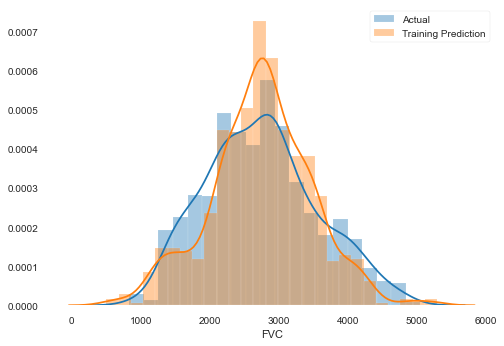

In [220]:
model2 = make_pipeline(ce.OrdinalEncoder(),
                       StandardScaler(),
                       LinearRegression())
model2.fit(X_train,y_train)
y_train_pred = model2.predict(X_train)
y_val_pred = model2.predict(X_val)

print("Training mean squared error:",mean_squared_error(y_train,y_train_pred))

sns.distplot(y_train, label='Actual')
sns.distplot(y_train_pred, label='Training Prediction')
plt.legend();

Val mean squared error 123597.39958602069


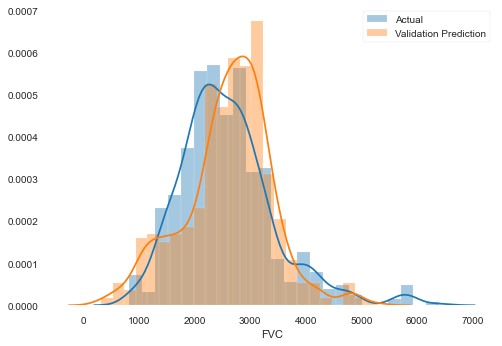

In [221]:
print("Val mean squared error",mean_squared_error(y_val,y_val_pred))
sns.distplot(y_val, label='Actual')
sns.distplot(y_val_pred, label='Validation Prediction')
plt.legend();

In [67]:
df.head(3)

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker


In [87]:
sub = pd.read_csv('data/sample_submission.csv')
sub.head(1)
# sub.shape

,Patient_Week,FVC,Confidence
0,ID00419637202311204720264_-12,2000,100


In [75]:
sub['Weeks'] = sub['Patient_Week'].apply(lambda x: int(x.split('_')[-1]))
sub['Patient'] = sub['Patient_Week'].apply(lambda x: x.split('_')[0])
sub.head(2)

,Patient_Week,FVC,Confidence,Weeks,Patient
0,ID00419637202311204720264_-12,2000,100,-12,ID00419637202311204720264
1,ID00421637202311550012437_-12,2000,100,-12,ID00421637202311550012437


In [99]:
test = pd.read_csv('data/test.csv')
test.head(30)

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked


In [121]:
sub = pd.read_csv('data/sample_submission.csv')
sub['Weeks'] = sub['Patient_Week'].apply(lambda x: int(x.split('_')[-1]))
sub['Patient'] = sub['Patient_Week'].apply(lambda x: x.split('_')[0])
test = pd.read_csv('data/test.csv')
test = pd.merge(sub, test, on = ['Patient'], how='outer')
test.head(2)

,Patient_Week,FVC_x,Confidence,Weeks_x,Patient,Weeks_y,FVC_y,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264_-12,2000,100,-12,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00419637202311204720264_-11,2000,100,-11,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker


In [222]:
sub = pd.read_csv('data/sample_submission.csv')
sub['Weeks'] = sub['Patient_Week'].apply(lambda x: int(x.split('_')[-1]))
sub['Patient'] = sub['Patient_Week'].apply(lambda x: x.split('_')[0])
test = pd.read_csv('data/test.csv')
test = pd.merge(sub, test, on = ['Patient'], how='outer')

# def wrangle(df):
#     max_Percent = df[['Patient','Percent']].sort_values('Percent', ascending=False).drop_duplicates(['Patient'])
#     min_Percent = df[['Patient','Percent']].sort_values('Percent', ascending=True).drop_duplicates(['Patient'])
#     max_Weeks = df[['Patient','Weeks_x']].sort_values('Weeks_x', ascending=False).drop_duplicates(['Patient'])
#     min_Weeks = df[['Patient','Weeks_x','Percent']].sort_values('Weeks_x', ascending=True).drop_duplicates(['Patient'])

# #     df = pd.merge(df, max_Percent, how='left', on=['Patient'], suffixes=(None, '_max'))
# #     df = pd.merge(df, min_Percent, how='left', on=['Patient'], suffixes=(None, '_at_Weeks_min',))
# #     df = pd.merge(df, max_Weeks, how='left', on=['Patient'], suffixes=(None, '_max'))
# #     df = pd.merge(df, min_Weeks, how='left', on=['Patient'], suffixes=(None, '_min'))

# #     df['Weekly_Avg_Percent_Change'] = (df['Percent_max'] - df['Percent_min']) / (df['Weeks_max'] - df['Weeks_min']) * -1

#     age = df['Age'].min()
#     converted_age = getattr(age, "tolist", lambda: value)()
#     df['Age_Scaled'] = df['Age'].astype(int) - converted_age

# #     df['FVC_at_week_0'] = df.loc[df['Weeks_y'] == 0, 'FVC_y']
# #     df['FVC_at_week_6'] = df.loc[df['Weeks_y'] == 6, 'FVC_y']
# #     df['FVC_at_week_15'] = df.loc[df['Weeks_y'] == 15, 'FVC_y']
# #     df['FVC_at_week_17'] = df.loc[df['Weeks_y'] == 17, 'FVC_y']
#     df.fillna(0, inplace=True)
#     return df

# test = wrangle(test)

test.drop(columns = ['Patient_Week', 'Patient','FVC_x','Confidence','Weeks_y','FVC_y'], inplace=True)

test.head(3)

,Weeks_x,Percent,Age,Sex,SmokingStatus
0,-12,70.186855,73,Male,Ex-smoker
1,-11,70.186855,73,Male,Ex-smoker
2,-10,70.186855,73,Male,Ex-smoker


In [224]:
test.rename(columns = {'Weeks_x':'Weeks'}, inplace=True)
test.head(1)

,Weeks,Percent,Age,Sex,SmokingStatus
0,-12,70.186855,73,Male,Ex-smoker


In [223]:
X_train.head(2)

,Weeks,Percent,Age,Sex,SmokingStatus
0,-4,58.253649,79,Male,Ex-smoker
1,5,55.712129,79,Male,Ex-smoker


In [228]:
s = pd.read_csv('data/sample_submission.csv')
s.head(3)

,Patient_Week,FVC,Confidence
0,ID00419637202311204720264_-12,2000,100
1,ID00421637202311550012437_-12,2000,100
2,ID00422637202311677017371_-12,2000,100


In [232]:
s = pd.read_csv('data/sample_submission.csv')

model2 = make_pipeline(ce.OrdinalEncoder(),
                       StandardScaler(),
                       LinearRegression())
model2.fit(X_train,y_train)
y_pred = model2.predict(test)
sub = s[['Patient_Week']]
sub['FVC'] = y_pred
sub['Confidence'] = sub['FVC'].std()
sub.head(3)

,Patient_Week,FVC,Confidence
0,ID00419637202311204720264_-12,2621.972509,188.303116
1,ID00421637202311550012437_-12,2621.890147,188.303116
2,ID00422637202311677017371_-12,2621.807786,188.303116


In [211]:
y_pred.shape

(730,)

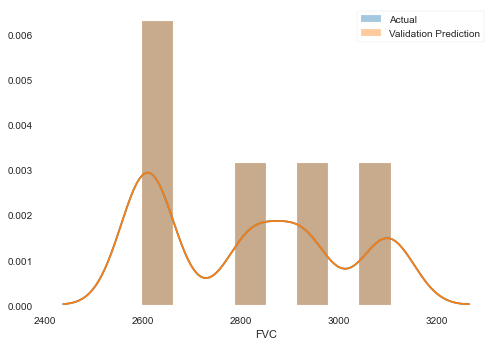

In [230]:
sns.distplot(sub['FVC'], label='Actual')
sns.distplot(sub['FVC'], label='Validation Prediction')
plt.legend();